In [1]:
"""
    Polynomial Regression of degree 1, 2, 3, 4, 5, 6
"""

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df = pd.read_csv("assets/dataset.txt", sep = ",", names = ["id", "longtitude", "latitude", "altitude"])

In [45]:
df = (df - df.mean())/(df.std())
valueArray = df.to_numpy()

In [46]:
X = valueArray[0:,1:3]
Y = valueArray[0:,3:]

train = 0.6
validation = 0.2
test = 1- train - validation

train_X = X[:int(train*X.shape[0])]
train_X = np.insert(train_X,0,1,axis=1) #Adding bias
trainY = Y[:int(train*X.shape[0])]
validation_X = X[int(train*X.shape[0]): int((train+validation)*X.shape[0])]
validation_X = np.insert(validation_X,0,1,axis=1) #Adding bias
validation_Y = Y[int(train*X.shape[0]): int((train+validation)*X.shape[0])]
test_X = X[int((train+validation)*X.shape[0]):]
test_X = np.insert(test_X,0,1,axis=1) #Adding bias
test_Y = Y[int((train+validation)*X.shape[0]):]

In [47]:
# Testing metrics
train_RMSE = {}
train_R2 = {}
test_RMSE = {}
test_R2 = {}
def RMSE(actualY, predictedY):
    N = actualY.shape[0]
    RMSE = np.sqrt(np.sum((np.power(actualY - predictedY, 2)/N), axis = 0))
    return RMSE
def R2(actualY, predictedY):
    meanY = np.mean(actualY, axis = 0)
    TSS = np.sum(np.power(actualY - meanY, 2), axis = 0)
    RSS = np.sum(np.power(actualY - predictedY, 2), axis = 0)
    return (1 - RSS/TSS)

In [48]:
# For only degree >= 2
def addPolynomialFeatures(X, degree):
    for i in range(degree + 1):
        X = np.concatenate((X, X[:,1:2]**(i) * X[:,2:3]**(degree - i)), axis=1)
    return X

In [56]:
def gradientDescent(train_X, train_Y, test_X, test_Y, alpha, maxIterations, weights, degree):
    """
    This function implements all the batch gradient descent with no regularization.
    At each iteration all the weights are updated with gradient calculated
    over all training points
    """
    # Training
    costs = []
    iters = []
    trainX = train_X
    trainY = train_Y
    m = trainX.shape[0]
    prevCost, currCost = 0.0, 0.0
    for iteration in range(maxIterations):
        gradient = np.sum(trainX * (trainX @ weights.T - trainY), axis=0)
        currCost = np.sum(np.power(((trainX @ weights.T) - trainY),2))/(2 * m)
        weights = weights - (alpha/m) * gradient
        #Plotting loss over train set for every 20 iterations
        if iteration % 20 == 0:
            costs.append(currCost)
            iters.append(iteration + 1)
        #Stopping Criterion
        if iteration != 0 and abs(prevCost - currCost) < 1e-10:
            break
        prevCost = currCost
    print("Optimal Cost is {}".format(currCost))
    print("Converging at {}th iteration with learning rate {}".format(iteration+1,alpha))
    plt.title("Batch Gradient Descent")
    plt.xlabel("No Of Iterations")
    plt.ylabel("Cost")
    plt.plot(iters,costs)
    plt.show()
    train_RMSE['batch'] = RMSE(trainY, trainX.dot(weights.T))[0]
    train_R2['batch'] = R2(trainY, trainX.dot(weights.T))[0]
    # Testing
    predicted_Y = test_X.dot(weights.T)
    test_RMSE['batch'] = RMSE(test_Y, predicted_Y)[0]
    test_R2['batch'] = R2(test_Y, predicted_Y)[0]
    return weights

Optimal Cost is 173.13728754045792
Converging at 509th iteration with learning rate 0.05


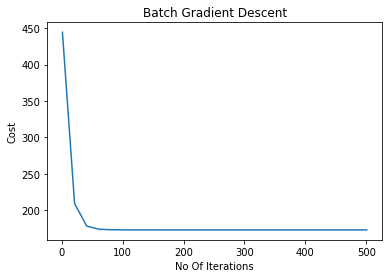

array([[22.45260756,  3.26808601, -3.53050677]])

In [57]:
# Degree 1
gradientDescent(train_X, train_Y, test_X, test_Y, 0.05, 1000, np.random.randn(1, train_X.shape[1]), 1)

Optimal Cost is 0.48564650053824365
Converging at 1213th iteration with learning rate 0.05


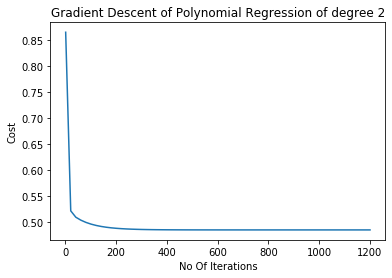

In [13]:
# Degree 2
degree = 2
X_train = addPolynomialFeatures(train_X, degree)
X_test = addPolynomialFeatures(test_X, degree)
gradientDescent(X_train, train_Y, X_test, test_Y, 0.05, 4000, np.random.randn(1, X_train.shape[1]), degree)

Optimal Cost is 0.47027709163042175
Converging at 4000th iteration with learning rate 0.005


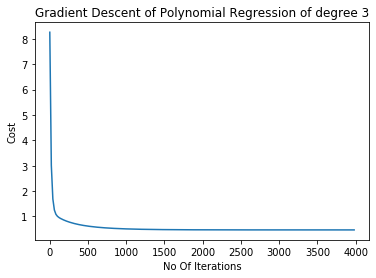

In [14]:
# Degree 3
degree = 3
X_train = addPolynomialFeatures(train_X, degree)
X_test = addPolynomialFeatures(test_X, degree)
gradientDescent(X_train, train_Y, X_test, test_Y, 0.005, 4000, np.random.randn(1, X_train.shape[1]), degree)

Optimal Cost is 1.1755261308935763
Converging at 4000th iteration with learning rate 0.0001


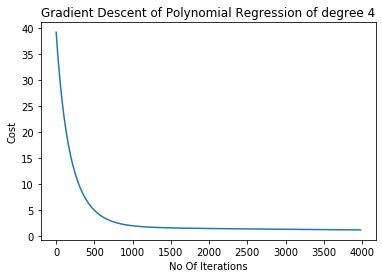

In [15]:
# Degree 4
degree = 4
X_train = addPolynomialFeatures(train_X, degree)
X_test = addPolynomialFeatures(test_X, degree)
gradientDescent(X_train, train_Y, X_test, test_Y, 0.0001, 4000, np.random.randn(1, X_train.shape[1]), degree)

Optimal Cost is 1.0864989122444229
Converging at 4000th iteration with learning rate 0.0001


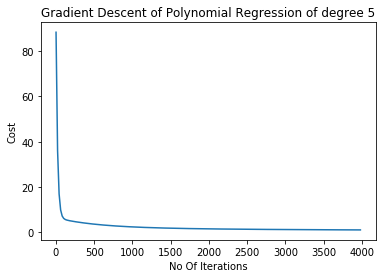

In [16]:
# Degree 5
degree = 5
X_train = addPolynomialFeatures(train_X, degree)
X_test = addPolynomialFeatures(test_X, degree)
gradientDescent(X_train, train_Y, X_test, test_Y, 0.0001, 4000, np.random.randn(1, X_train.shape[1]), degree)

Optimal Cost is 5.100811834247672
Converging at 4000th iteration with learning rate 1e-05


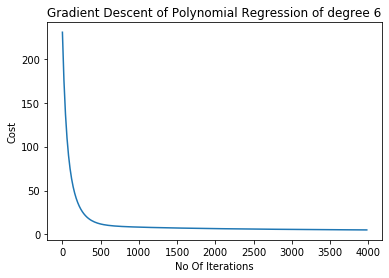

In [17]:
# Degree 6
degree = 6
X_train = addPolynomialFeatures(train_X, degree)
X_test = addPolynomialFeatures(test_X, degree)
gradientDescent(X_train, train_Y, X_test, test_Y, 0.00001, 4000, np.random.randn(1, X_train.shape[1]), degree)

In [18]:
# Regularization

In [19]:
X_train = addPolynomialFeatures(train_X, 6)
X_test = addPolynomialFeatures(test_X, 6)

In [20]:
validation_loss = []
reg_parameters = []
def gradientDescentWithL1Regularization(X, Y, X_test, Y_test, alpha, maxIterations, weights, regParameter):
    """
    This function implements the gradient descents with L1 norm regularization.
    At each iteration all the weights are updated with gradient calculated
    over all training points
    """
    # Training
    costs = []
    iters = []    
    shuffledData = np.concatenate((X, Y), axis = 1)
    np.random.shuffle(shuffledData)
    trainX = X
    trainY = Y
    validationSize = int(0.1 * X_test.shape[0])
    validationX = X_test[0:validationSize]
    test_X = X_test[validationSize+1:]
    validationY =  Y_test[0:validationSize]
    test_Y = Y_test[validationSize+1:]
    m = trainX.shape[0]
    prevCost, currCost = 0.0, 0.0
    for iteration in range(maxIterations):
        c = (regParameter)/(2 * m)
        gradient = np.sum(trainX * (trainX @ weights.T - trainY), axis=0) + c * np.sign(weights)
        weightList = [weights[0][0], weights[0][1], weights[0][2]]
        weightList = np.asarray(weightList)
        currCost = np.sum(np.power(((trainX @ weights.T) - trainY),2))/(2 * m) + regParameter/(2 * m) * np.linalg.norm(weightList, 1) 
        weights = weights - (alpha/m) * gradient
        #Plotting loss over train set for every 20 iterations
        if iteration%20 == 0:
            costs.append(currCost)
            iters.append(iteration + 1) 
        #Stopping Criterion
        if iteration != 0 and abs(prevCost - currCost) < 1e-10:
            break
        prevCost = currCost
    # Find loss over validation set
    weightList = [weights[0][0], weights[0][1], weights[0][2]]
    weightList = np.asarray(weightList)
    validation_cost = np.sum(np.power(((validationX @ weights.T) - validationY),2))/(2 * m) + regParameter/(2 * m) * np.linalg.norm(weightList, 1)
    validation_loss.append(validation_cost)
    reg_parameters.append(regParameter)
    # Printing the results
    print("Optimal Cost is {}".format(currCost))
    print("Converging at {}th iteration with learning rate {} and {} regularization parameter".format(iteration+1,alpha,regParameter))
    plt.title("Gradient Descent")
    plt.xlabel("No Of Iterations")
    plt.ylabel("Cost")
    plt.plot(iters,costs)
    plt.show()
    train_RMSE['l1'] = RMSE(trainY, trainX.dot(weights.T))[0]
    train_R2['l1'] = R2(trainY, trainX.dot(weights.T))[0]
    # Testing
    predicted_Y = test_X.dot(weights.T)
    test_RMSE['l1'] = RMSE(test_Y, predicted_Y)[0]
    test_R2['l1'] = R2(test_Y, predicted_Y)[0]
    #return weights

In [ ]:
list = [0.0, 0.5, 1.0, 1.3, 1.8, 2.0]
for reg in list:
    gradientDescentWithL1Regularization(X_train, train_Y, X_test, test_Y, 0.0002, 5000, np.zeros([1, X_train.shape[1]]), reg)
plt.title("L1 Regularization")
plt.xlabel("Regularization Parameter")
plt.ylabel("Validation Loss")
plt.plot(reg_parameters, validation_loss)

In [ ]:
validation_loss = []
reg_parameters = []
def gradientDescentWithL2Regularization(X, Y, alpha, maxIterations, weights, regParameter):
    """
    This function implements the gradient descents with L2 norm regularization.
    At each iteration all the weights are updated with gradient calculated
    over all training points. 
    """
    # Training
    costs = []
    iters = []    
    shuffledData = np.concatenate((X, Y), axis = 1)
    np.random.shuffle(shuffledData)
    trainX = X
    trainY = Y
    validationSize = int(0.1 * X_test.shape[0])
    validationX = X_test[0:validationSize]
    test_X = X_test[validationSize+1:]
    validationY =  Y_test[0:validationSize]
    test_Y = Y_test[validationSize+1:]
    m = trainX.shape[0]
    prevCost, currCost = 0.0, 0.0
    for iteration in range(maxIterations):
        gradient = np.sum(trainX * (trainX @ weights.T - trainY), axis=0)
        weightList = [weights[0][0], weights[0][1], weights[0][2]]
        weightList = np.asarray(weightList)
        currCost = np.sum(np.power(((trainX @ weights.T) - trainY),2))/(2 * m) + regParameter/(2 * m) * np.linalg.norm(weightList, 2) 
        weights = (1 - alpha*regParameter/m)*weights - (alpha/m) * gradient
        #Plotting loss over train set for every 20 iterations
        if iteration%20 == 0:
            costs.append(currCost)
            iters.append(iteration + 1)
        #Stopping Criterion
        if iteration != 0 and abs(prevCost - currCost) < 1e-10:
            break
        prevCost = currCost
     # Find loss over validation set
    weightList = [weights[0][0], weights[0][1], weights[0][2]]
    weightList = np.asarray(weightList)
    validation_cost = np.sum(np.power(((validationX @ weights.T) - validationY),2))/(2 * m) + regParameter/(2 * m) * np.linalg.norm(weightList, 2)
    validation_loss.append(validation_cost)
    reg_parameters.append(regParameter)
    # Printing the results
    print("Optimal Cost is {}".format(currCost))
    print("Converging at {}th iteration with learning rate {} and {} regularization parameter".format(iteration+1,alpha,regParameter))                             
    plt.title("Gradient Descent")
    plt.xlabel("No Of Iterations")
    plt.ylabel("Cost")
    plt.plot(iters,costs)
    plt.show()
    train_RMSE['l2'] = RMSE(trainY, trainX.dot(weights.T))[0]
    train_R2['l2'] = R2(trainY, trainX.dot(weights.T))[0]
    # Testing
    predicted_Y = test_X.dot(weights.T)
    test_RMSE['l2'] = RMSE(test_Y, predicted_Y)[0]
    test_R2['l2'] = R2(test_Y, predicted_Y)[0]
    return weights

In [ ]:
list = [0.0, 0.5, 1.0, 1.3, 1.8, 2.0]
for reg in list:
    gradientDescentWithL2Regularization(X_train, train_Y, X_test, test_Y, 0.0002, 5000, np.zeros([1, X_train.shape[1]]), reg)
plt.title("L2 Regularization")
plt.xlabel("Regularization Parameter")
plt.ylabel("Validation Loss")
plt.plot(reg_parameters, validation_loss)

In [ ]:
results_dict = {'Gradient Descent for Polynomial Regression Model' : 
                    ['1', '2', '3','4','5', '6'],
                 'RMSE Training data': 
                    [train_RMSE['batch1'], train_RMSE['batch2'], train_RMSE['batch3'], train_RMSE['batch4'], train_RMSE['batch5'], , train_RMSE['batch6']],
                 'R^2 Training data': 
                    [train_R2['batch1'], train_R2['batch2'], train_R2['batch3'], train_R2['batch4'], train_R2['batch5'], , train_R2['batch6']],
                 'RMSE Testing data': 
                    [test_RMSE['batch1'], test_RMSE['batch2'], test_RMSE['batch3'], test_RMSE['batch4'], test_RMSE['batch5'], , test_RMSE['batch6']], 
                 'R^2 Testing data': 
                    [test_R2['batch1'], test_R2['batch2'], test_R2['batch3'], test_R2['batch4'], test_R2['batch5'], , test_R2['batch6']]  
                }
results_df = pd.DataFrame(data = results_dict)

In [ ]:
results_df

In [ ]:
results_dict = {'Regularized Gradient Descent for 6th degree Regression Model' : 
                    ['L1', 'L2'],
                 'RMSE Training data': 
                    [train_RMSE['l1'], train_RMSE['l2']],
                 'R^2 Training data': 
                    [train_R2['l1'], train_R2['l2']],
                 'RMSE Testing data': 
                    [test_RMSE['l1'], test_RMSE['l2']], 
                 'R^2 Testing data': 
                    [test_R2['l1'], test_R2['l2']]  
                }
results_df = pd.DataFrame(data = results_dict)

In [ ]:
results_df